<a href="https://colab.research.google.com/github/Marco10Reda/Capstone-sulla-scienza-dei-dati-applicata-di-Marco10Reda/blob/main/Assignment_Exploring_and_Preparing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LABORATORIO EDA con Visualizzazione

Assignment: Exploring and Preparing Data

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

Objectives

-Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

-Exploratory Data Analysis
Preparing Data Feature Engineering

In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

Exploratory Data Analysis

In [ ]:
import pandas as pd
import requests
import io

def importa_file_csv_da_url(URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"):
    """
    Scarica un file CSV da un URL e lo importa in un DataFrame di pandas.

    Args:
        url (str): L'URL completo del file CSV.

    Returns:
        pd.DataFrame: Il DataFrame di pandas contenente i dati del CSV.
                      Restituisce None in caso di errore.
    """
    print("Sto scaricando il file da: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
    print("IL nome del file è: SpaceX Falcon 9 First Stage Landing Prediction")
    try:
        # 1. Invia una richiesta GET per scaricare il file.
        response = requests.get(URL, timeout=10)

        # 2. Solleva un errore se la richiesta non è andata a buon fine.
        response.raise_for_status()

        # 3. Leggi il contenuto scaricato in un buffer di memoria.
        data_buffer = io.BytesIO(response.content)

        # 4. Importa i dati dal buffer nel DataFrame pandas.
        df = pd.read_csv(data_buffer)

        print("File scaricato e importato con successo!")
        return df

    except requests.exceptions.RequestException as e:
        print(f"Errore: Impossibile scaricare il file dall'URL '{url}'.")
        print(f"Dettagli errore: {e}")
        return None
    except Exception as e:
        print(f"Si è verificato un errore durante l'elaborazione del file: {e}")
        return None

# --- ESEMPIO DI UTILIZZO ---
if __name__ == "__main__":
    # Sostituisci questo URL con il link al tuo file CSV
    URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

    # Chiama la funzione per importare il file
    data = importa_file_csv_da_url(URL)

    # Controlla se l'importazione ha avuto successo prima di procedere
    if data is not None:
        print("\nPrime 5 righe del DATASET:")
        print(data.head())

        # Qui puoi aggiungere qualsiasi analisi o elaborazione desiderata
        # Per esempio, calcolare la media del punteggio di sicurezza
        # media_sicurezza = dati_del_csv['Safety Score'].mean()
        # print(f"\nIl punteggio medio di sicurezza è: {media_sicurezza:.2f}")

Sto scaricando il file da: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv
IL nome del file è: SpaceX Falcon 9 First Stage Landing Prediction
File scaricato e importato con successo!

Prime 5 righe del DATASET:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     Fa

First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

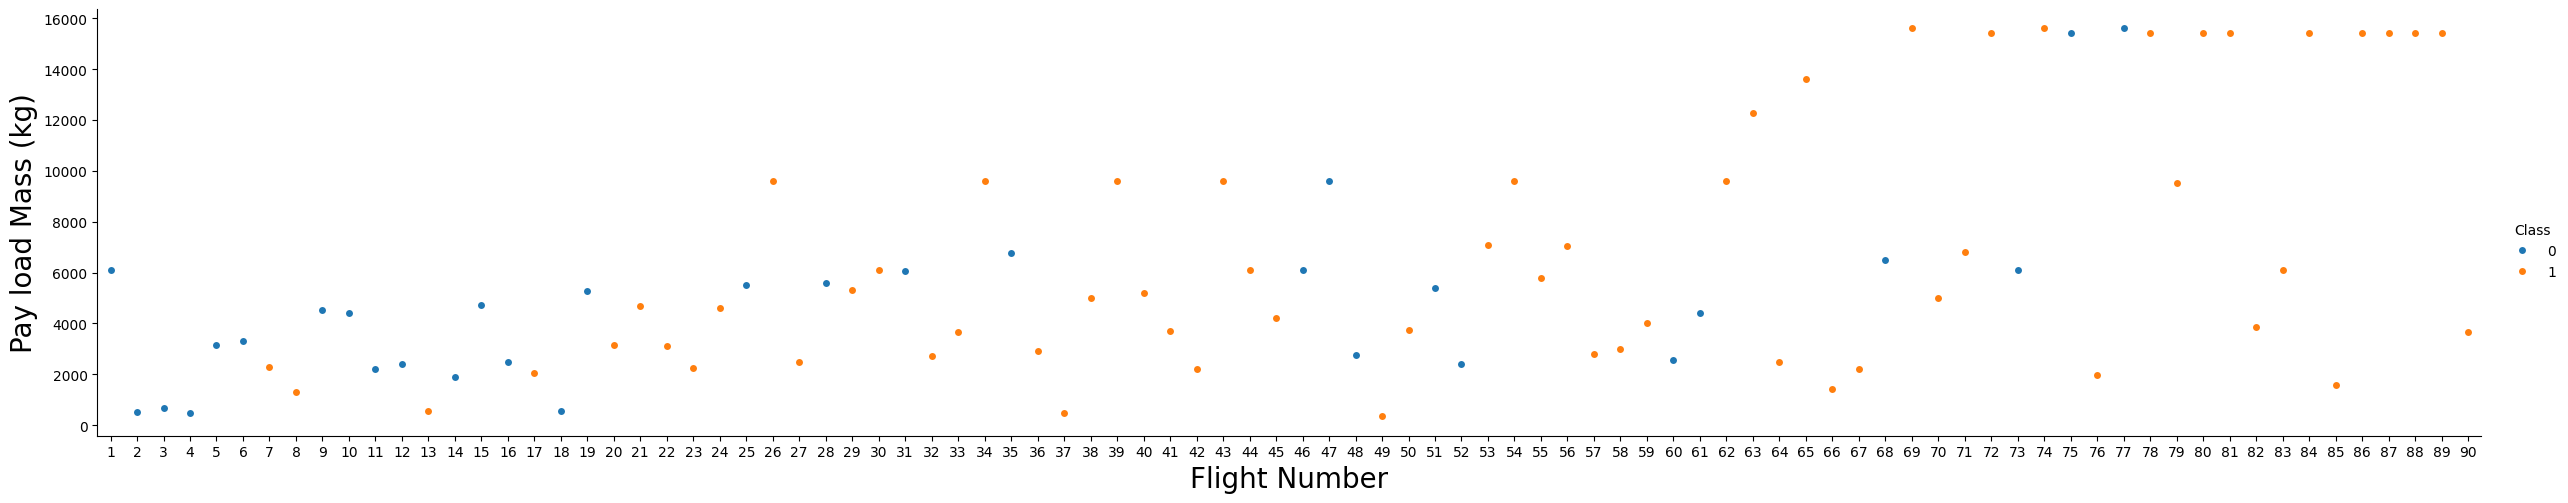

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

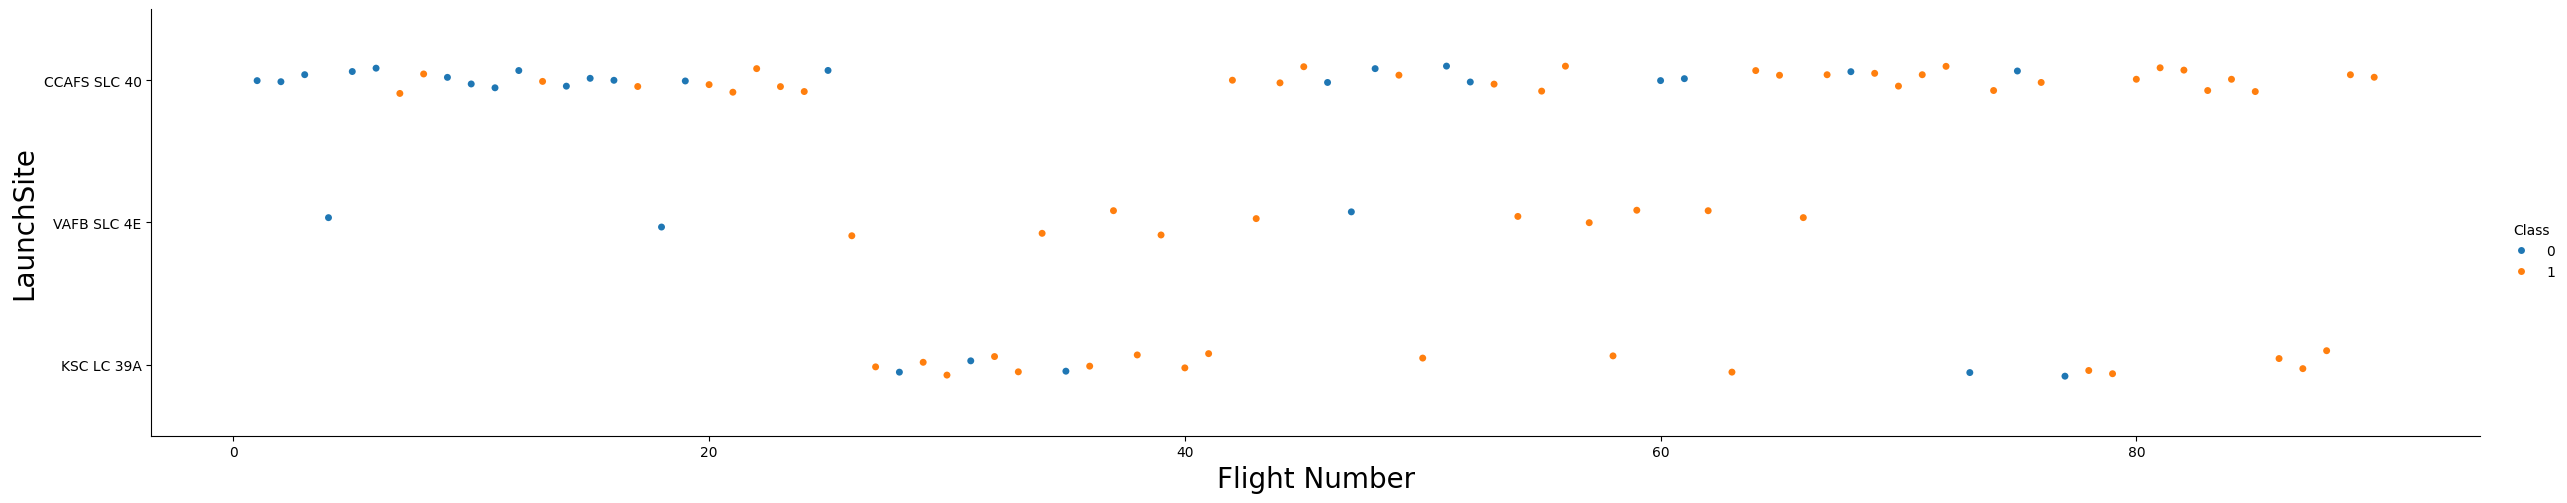

In [ ]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=data, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

TASK 2: Visualize the relationship between Payload Mass and Launch Site
We also want to observe if there is any relationship between launch sites and their payload mass.

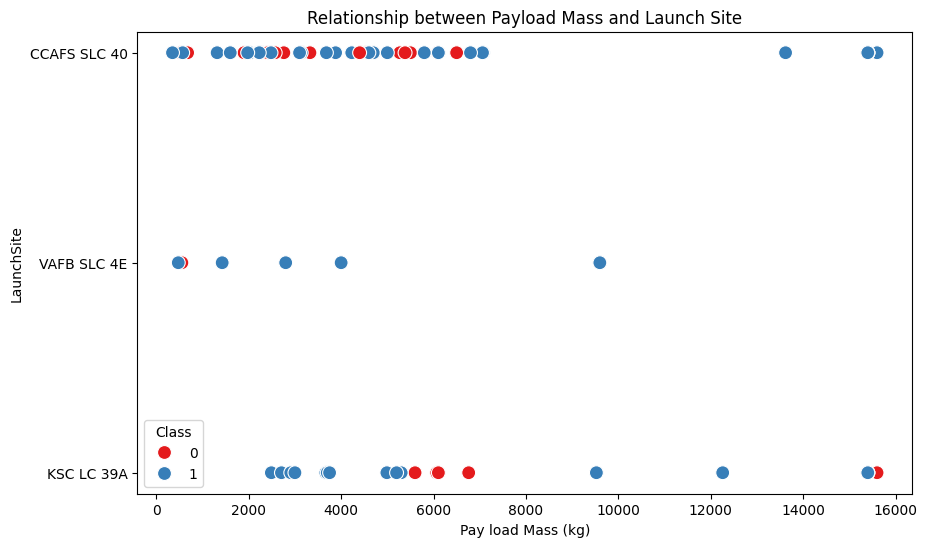

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x="PayloadMass",            # Asse X: Payload Mass
    y="LaunchSite",             # Asse Y: Launch Site
    hue="Class",                 # Colore in base al successo/fallimento
    palette="Set1",
    s=100                        # Dimensione dei punti
)
plt.title("Relationship between Payload Mass and Launch Site")
plt.xlabel("Pay load Mass (kg)")
plt.ylabel("LaunchSite")
plt.legend(title="Class")
plt.show()

TASK 3: Visualize the relationship between success rate of each orbit type
Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate of each orbit



/tmp/ipython-input-913718606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit", y="Class", data=success_rate_orbit, palette="Set2")


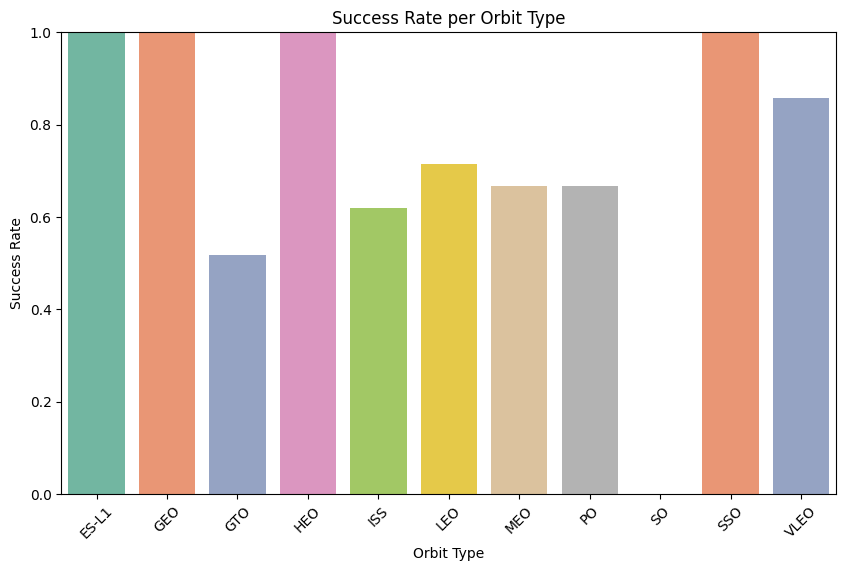

In [ ]:
# Calcolare il tasso di successo per ogni tipo di orbita
success_rate_orbit = data.groupby("Orbit")["Class"].mean().reset_index()

# Visualizzare il risultato
plt.figure(figsize=(10,6))
sns.barplot(x="Orbit", y="Class", data=success_rate_orbit, palette="Set2")
plt.title("Success Rate per Orbit Type")
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.ylim(0,1)  # perché la Class è 0 o 1
plt.show()


TASK 4: Visualize the relationship between FlightNumber and Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

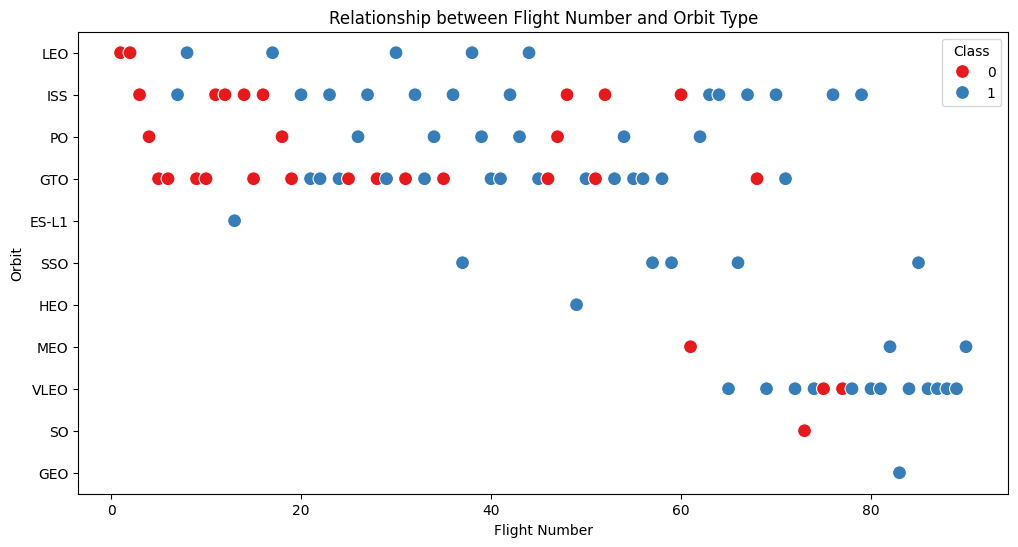

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=data,
    x="FlightNumber",
    y="Orbit",
    hue="Class",       # Colore = successo/fallimento
    palette="Set1",
    s=100
)

plt.title("Relationship between Flight Number and Orbit Type")
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.legend(title="Class")
plt.show()

TASK 5: Visualize the relationship between Payload Mass and Orbit type
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

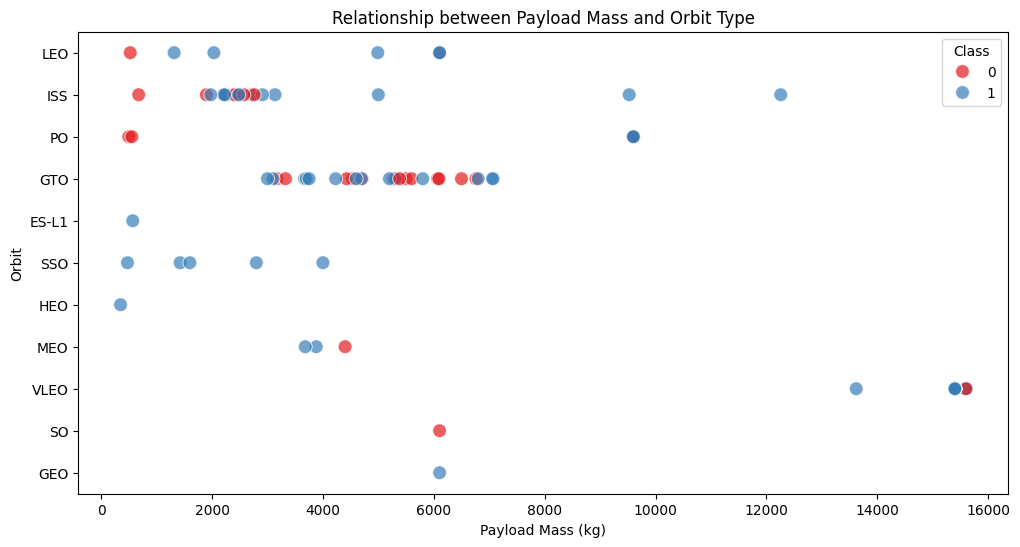

In [ ]:
# Scatter plot Payload Mass vs Orbit
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=data,
    x="PayloadMass",   # Asse X: Payload Mass
    y="Orbit",               # Asse Y: Orbit
    hue="Class",             # Colore = successo/fallimento
    palette="Set1",
    s=100,
    alpha=0.7                # Trasparenza per punti sovrapposti
)

plt.title("Relationship between Payload Mass and Orbit Type")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.legend(title="Class")
plt.show()

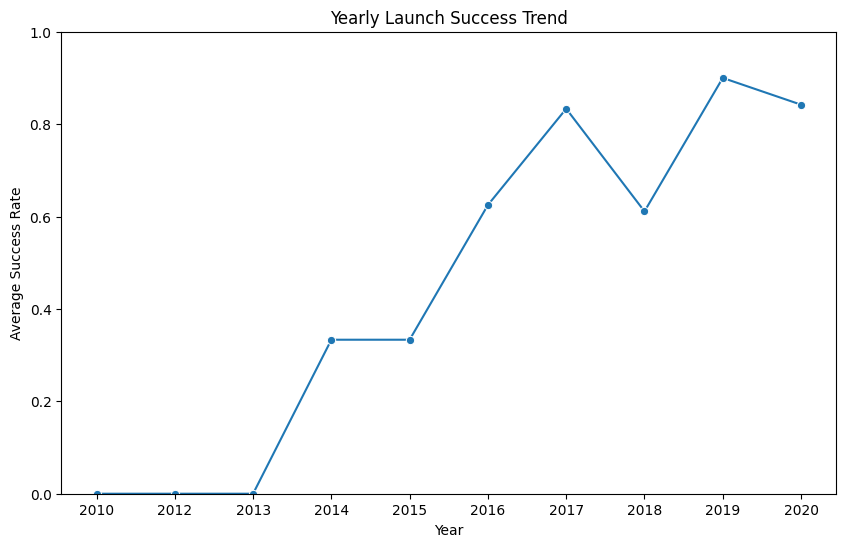

In [ ]:
# Estrai l'anno dalla colonna Date
year = []
def Extract_year():
    for i in data["Date"]:
        year.append(i.split("-")[0])
    return year

data['Year'] = Extract_year()

# Calcola il tasso di successo medio per anno
yearly_success = data.groupby("Year")["Class"].mean().reset_index()

# Line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_success, x="Year", y="Class", marker="o")
plt.title("Yearly Launch Success Trend")
plt.xlabel("Year")
plt.ylabel("Average Success Rate")
plt.ylim(0,1)  # perché il success rate è una percentuale
plt.show()